In [6]:
import numpy as np
from sklearn import ensemble, svm
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
# make data

train_bad = np.genfromtxt('/Users/david/Desktop/AutomatedAcquisitions/k562_82C_120s/bad_coords.csv_features.csv', delimiter = ',' )
train_med = np.genfromtxt('/Users/david/Desktop/AutomatedAcquisitions/k562_82C_120s/med_coords.csv_features.csv', delimiter = ',' )
train_good = np.genfromtxt('/Users/david/Desktop/AutomatedAcquisitions/k562_82C_120s/good_coords.csv_features.csv', delimiter = ',' )

test_bad = np.genfromtxt('/Users/david/Desktop/AutomatedAcquisitions/k562_82C_240s/bad_coords.csv_features.csv', delimiter = ',' )
test_med = np.genfromtxt('/Users/david/Desktop/AutomatedAcquisitions/k562_82C_240s/med_coords.csv_features.csv', delimiter = ',' )
test_good = np.genfromtxt('/Users/david/Desktop/AutomatedAcquisitions/k562_82C_240s/good_coords.csv_features.csv', delimiter = ',' )

test = np.concatenate((test_good, test_bad, test_med))
test_gt = np.concatenate((np.array([1] * test_good.shape[0]),np.array([0] * test_bad.shape[0]), np.array([0] * test_med.shape[0])) )

train = np.concatenate((train_good, train_bad, train_med))
train_gt = np.concatenate((np.array([1] * train_good.shape[0]),np.array([0] * train_bad.shape[0]), np.array([0] * train_med.shape[0])) )
train_gt

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [41]:
sel = SelectKBest(chi2, k =40)
train_sel = sel.fit_transform(train, train_gt)
train_sel

array([[  1.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   1., ...,   0.,   0.,   1.],
       [  0.,   0.,   0., ...,   0.,   1.,   1.],
       ..., 
       [  1.,   0.,   0., ...,  12.,   6.,  11.],
       [  0.,   0.,   1., ...,   4.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [11]:
#clf = ensemble.RandomForestClassifier(n_estimators=100)
clf = svm.SVC()
clf.fit(train, train_gt)
print(clf.predict(test))
print(test_gt)
sum (clf.predict(test) != test_gt) / test_gt.size

#features = clf.feature_importances_.reshape((2,5,5,5))
#plt.imshow(np.sum(features[1,:,:,:], axis=0))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


0.17714285714285713

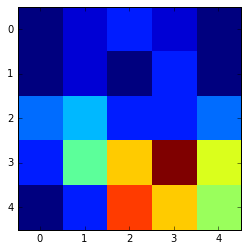

In [125]:
img1 = train_good[5,:].reshape((2,5,5,5))
plt.imshow(np.mean(img1[0,:,:,:], axis=0), interpolation='nearest')